## Importing Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.16.1'

## Data Preprocessing

### Preprocessing training set

In [3]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip  = True
)

training_set = train_datagen.flow_from_directory(
    '../data/dataset/training_set',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 8000 images belonging to 2 classes.


### Preprocessing test set

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory(
    '../data/dataset/test_set',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.


## Building CNN

### Initializing CNN

In [5]:
cnn = tf.keras.models.Sequential()

### Input Layer

In [6]:
cnn.add(tf.keras.layers.Input(shape=(64, 64, 3)))

### First Convolutional Layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))

2024-10-18 11:48:23.177338: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-10-18 11:48:23.177364: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-10-18 11:48:23.177372: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-10-18 11:48:23.177393: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-18 11:48:23.177421: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### First Pooling Layer

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

### Second Convolutional Layer

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'))

### Second Pooling Layer

In [10]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

### Flattening Layer

In [11]:
cnn.add(tf.keras.layers.Flatten())

### Full Connection

In [12]:
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

### Output Layer

In [13]:
cnn.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [14]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 813,217 (3.10 MB)

 Trainable params: 813,217 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

## Training CNN

### Compiling CNN

In [15]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training CNN on training set and evaluating on test set

In [16]:
model = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25


2024-10-18 11:48:23.799608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/opt/anaconda3/envs/dl/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 62ms/step - accuracy: 0.5350 - loss: 0.7006 - val_accuracy: 0.6760 - val_loss: 0.6103
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.6570 - loss: 0.6157 - val_accuracy: 0.6495 - val_loss: 0.6479
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.7042 - loss: 0.5611 - val_accuracy: 0.6905 - val_loss: 0.6150
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.7338 - loss: 0.5285 - val_accuracy: 0.7530 - val_loss: 0.5048
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 55ms/step - accuracy: 0.7581 - loss: 0.4954 - val_accuracy: 0.7190 - val_loss: 0.5518
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.7598 - loss: 0.4910 - val_accuracy: 0.7725 - val_loss: 0.4851
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.7738 - loss: 0.4715 - val_accuracy: 0.7740 - val_loss: 0.4673
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 14s 56ms/step - accuracy: 0.7866 - loss: 0.4477 - val_accurac

## Making Single Prediction

In [17]:
print("Class indices:", test_set.class_indices)

Class indices: {'cats': 0, 'dogs': 1}


In [23]:
test_image = image.load_img('../data/dataset/test_image/cat.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

In [24]:
result = cnn.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [25]:
training_set.class_indices

if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

cat


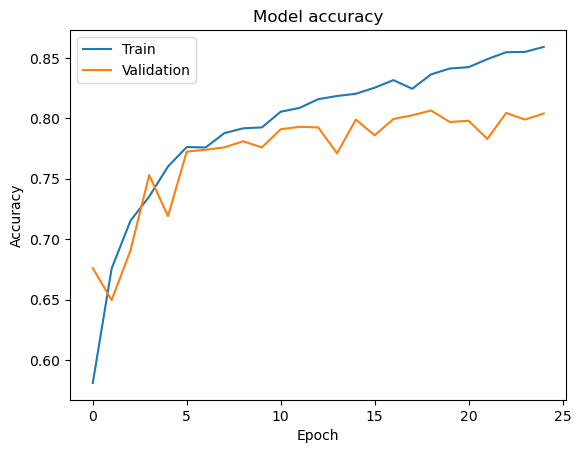

In [29]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


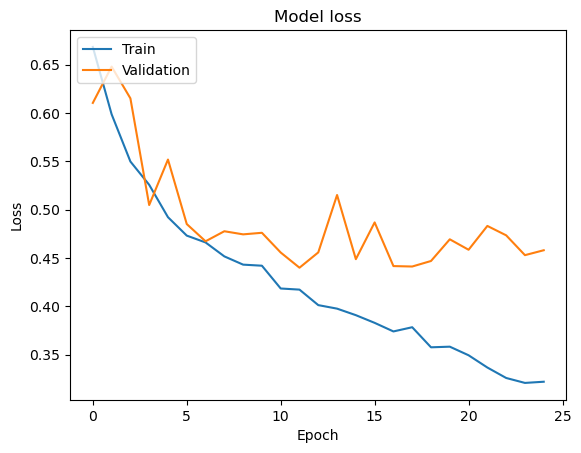

In [30]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step


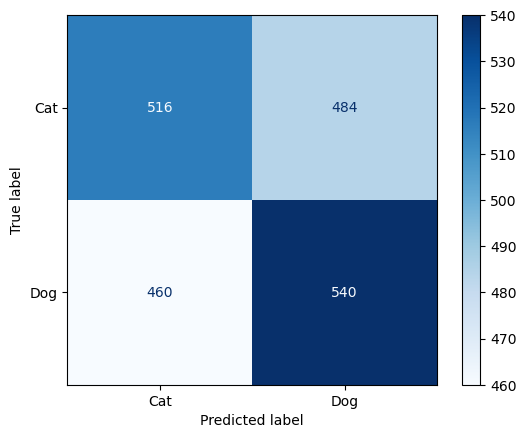

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = cnn.predict(test_set)
y_pred = np.where(y_pred > 0.5, 1, 0)

y_true = test_set.classes

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Cat', 'Dog'])
disp.plot(cmap=plt.cm.Blues)
plt.show()
